# Static Visualisation

Lets start by understanding the basic concepts of visualisation in 1D and 2D space.

For this purpose we  are looking at all the airports in the world. The data is taken from https://openflights.org/data.html

### Airports

- *Airport ID*: Unique OpenFlights identifier for this airport.
- *Name*:       Name of airport. May or may not contain the City name.
- *City*:	    Main city served by airport. May be spelled differently from Name.
- *Country*:    Country or territory where airport is located. See countries.dat to cross-reference to ISO 3166-1 codes.
- *IATA*:	    3-letter IATA code. Null if not assigned/unknown.
- *ICAO*: 	    4-letter ICAO code. Null if not assigned.
- *Latitude*:   Decimal degrees, usually to six significant digits. Negative is South, positive is North.
- *Longitude*:	Decimal degrees, usually to six significant digits. Negative is West, positive is East.
- *Altitude:	In feet.
- *Timezone*:	Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.
- *DST*:    	Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). See also: Help: Time
- *Tz*:         database time zone	Timezone in "tz" (Olson) format, eg. "America/Los_Angeles".
- *Type*: 	    Type of the airport. Value "airport" for air terminals, "station" for train stations, "port" for ferry terminals and "unknown" if not known. In airports.csv, only type=airport is included.
- *Source*: "OurAirports" for data sourced from OurAirports, "Legacy" for old data not matched to OurAirports (mostly DAFIF), "User" for unverified user contributions. In airports.csv, only source=OurAirports is included.



## Frame the Problem

- **1D - Continuous**: What is the distribution of airports by altitude? 
- **1D - Categorical**: What is the distribution in top 15 countries by number of airport?
- **2D - Categorical & Continuous**: What is the distribution of airports by altitude for each area?
- **2D - Categorical & Categorical**: How many airport are there in each country and each area?
- **2D / 3D - Continuous & Continuous**: Show the airports at each latitude and longitude point by altitude?
- **2D - Spatial**: Show the airports at each latitude and longitude point by altitude?

## Acquire the Data

In [1]:
import pandas as pd

In [2]:
# Read in the airports data.
airports = pd.read_csv("data/airports.dat.txt", header=None, na_values="\\N" )

Assign column headers to the dataframe

In [3]:
airports.columns = ["id", "name", "city", "country", "iata", "icao", "latitude", 
                    "longitude", "altitude", "offset", "dst", "timezone", "type", "source"]

In [4]:
airports.head()

,id,name,city,country,iata,icao,latitude,longitude,altitude,offset,dst,timezone,type,source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10.0,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10.0,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10.0,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10.0,U,Pacific/Port_Moresby,airport,OurAirports


## Refine the Data 

### Remove reduntant data 

Lets start by dropping redundant columns - in `airports` data frame, we don't need `type`, `source`

In [5]:
airports.drop(['type', 'source'], axis=1, inplace=True)

In [6]:
airports.head()

,id,name,city,country,iata,icao,latitude,longitude,altitude,offset,dst,timezone
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10.0,U,Pacific/Port_Moresby
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10.0,U,Pacific/Port_Moresby
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10.0,U,Pacific/Port_Moresby
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10.0,U,Pacific/Port_Moresby
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10.0,U,Pacific/Port_Moresby


In [7]:
airports.shape

(7184, 12)

In [8]:
airports.dtypes

id             int64
name          object
city          object
country       object
iata          object
icao          object
latitude     float64
longitude    float64
altitude       int64
offset       float64
dst           object
timezone      object
dtype: object

## Check for missing values

Lets start by checking for missing values

What is the difference between null and missing values. Check this post for more details on what is the difference and how python handles this - http://www.residentmar.io/2016/06/12/null-and-missing-data-python.html

In [9]:
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

Lets visually look at the missing numbers

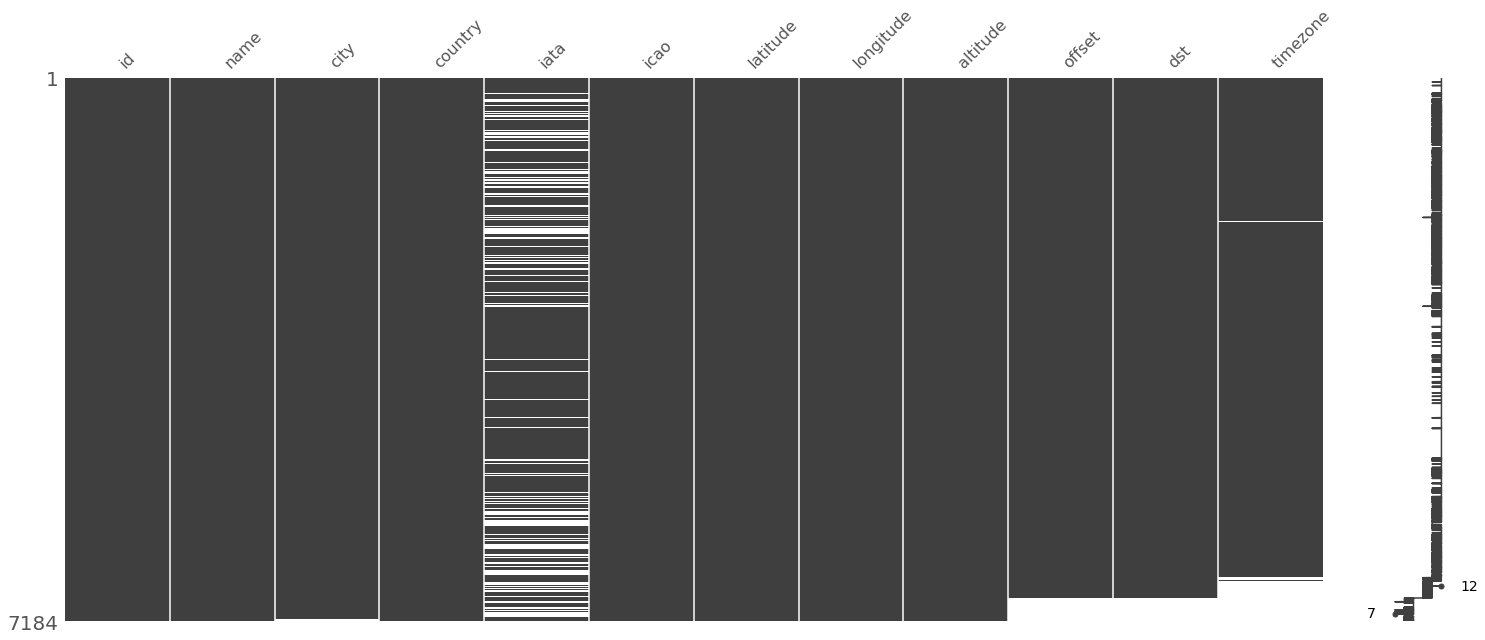

In [10]:
msno.matrix(airports)

It looks like there is many  missing numbers in `iata` and some missing values in `city`, `offset`, `dst` and `timezone`. Lets confirm.

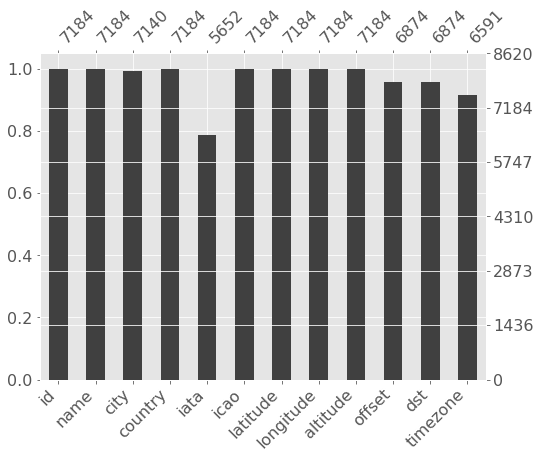

In [11]:
msno.bar(airports, figsize=(8,6))

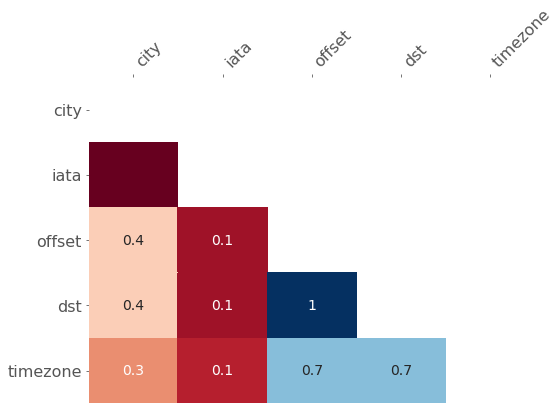

In [12]:
msno.heatmap(airports, figsize=(8,6))

In [13]:
airports.isnull().sum()

id              0
name            0
city           44
country         0
iata         1532
icao            0
latitude        0
longitude       0
altitude        0
offset        310
dst           310
timezone      593
dtype: int64

Lets just drop all the places where missing values are NA

In [14]:
airports.dropna(axis=0, how='any', inplace = True)

In [15]:
airports.isnull().sum()

id           0
name         0
city         0
country      0
iata         0
icao         0
latitude     0
longitude    0
altitude     0
offset       0
dst          0
timezone     0
dtype: int64

In [16]:
airports.shape

(5268, 12)

## Transform 

Lets get the general continental area from the timezone marker

In [17]:
airports['area'] = airports.timezone.str.split("/").str[0]

In [18]:
airports.area.unique()

array(['Pacific', 'America', 'Atlantic', 'Africa', 'Europe', 'Arctic',
       'Indian', 'Asia', 'Australia'], dtype=object)

In [19]:
airports.head()

,id,name,city,country,iata,icao,latitude,longitude,altitude,offset,dst,timezone,area
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10.0,U,Pacific/Port_Moresby,Pacific
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10.0,U,Pacific/Port_Moresby,Pacific
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10.0,U,Pacific/Port_Moresby,Pacific
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10.0,U,Pacific/Port_Moresby,Pacific
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10.0,U,Pacific/Port_Moresby,Pacific


## Explore

### Grammar of graphics 

- *data*: The data that you want to visualise.
- *aes*: A set of aesthetic mappings describing how variables in the data are mapped to aesthetic attributes that you can perceive.
- *geom*: Geometric objects represent what you actually see on the plot: points, lines, polygons, etc.
- *stat*: Statistical transformations summarise data in many useful ways. For example, binning and counting observations to create a histogram, or summarising a 2d relationship with a linear model.
- *scales*: The scales map values in the data space to values in an aesthetic space, whether it be colour, or size, or shape. Scales draw a legend or axes, which provide an inverse mapping to make it possible to read the original data values from the graph.
- *coord*: A coordinate system describes how data coordinates are mapped to the plane of the graphic. It also provides axes and gridlines to make it possible to read the graph. We normally use a Cartesian coordinate system, but a number of others are available, including polar coordinates and map projections.
- *facet*: A faceting specification describes how to break up the data into subsets and how to display those subsets as small multiples. This is also known as conditioning or latticing/trellising.

### Terminology

- data
- aes e.g. x, y, fill, color
- geom e.g. point, bar, line
- stat e.g. identity, bin, count
- scale e.g. log, reverse, color
- coord e.g. cartesian, polar, map
- facet e.g. wrap, grid

### Basic Syntax

Main arguments
- data set, usually a data.frame
- aesthetic mappings provided by aes function

General ggplot syntax
- ggplot(data) + aes(...) + geom_*(...) + … + stat_*(...) + …

Layer specifications
- geom_*(mapping, data, …, geom, position)
- stat_*(mapping, data, …, stat, position)
- Additional components: scales, coordinates, facet

### Question: What is the distribution of airports by altitude?

In [91]:
from plotnine import *

AttributeError: module 'matplotlib.pyplot' has no attribute 'options'

### 1 Dimensional: Continuous - Points

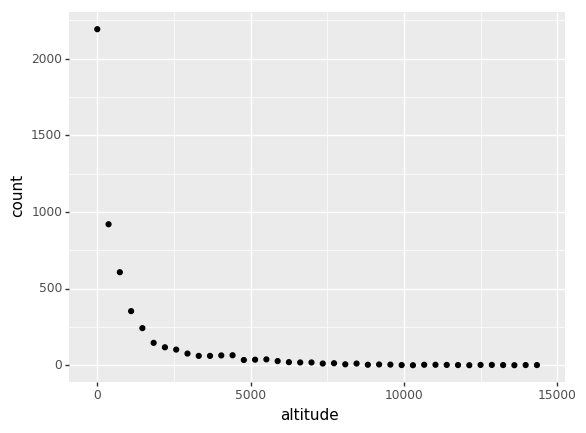

<ggplot: (-9223372036558040993)>

In [21]:
ggplot(airports) + aes(x = 'altitude', y= '..count..') + geom_point(stat = 'bin', bins = 40)

### 1 Dimensional: Continuous - Bars

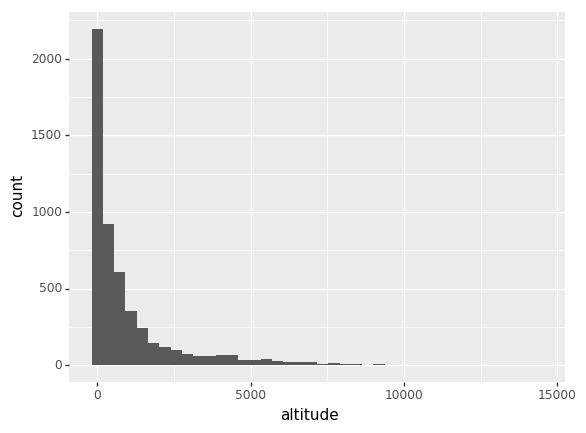

<ggplot: (296794828)>

In [22]:
ggplot(airports) + aes(x = 'altitude') + geom_histogram(bins = 40)

### 1 Dimensional: Continuous - Lines

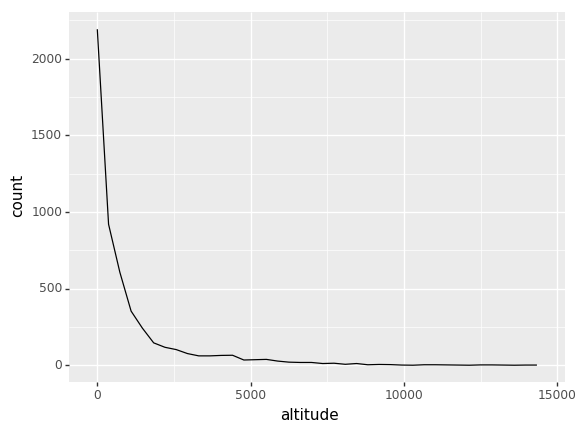

<ggplot: (296181638)>

In [23]:
ggplot(airports) + aes(x = 'altitude') + geom_freqpoly(bins = 40)

### 1 Dimensional: Continuous - Area

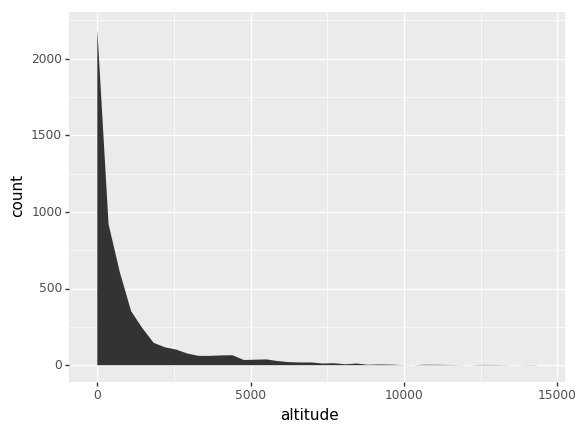

<ggplot: (-9223372036557889718)>

In [24]:
ggplot(airports) + aes(x = 'altitude', y = '..count..') + geom_area(stat = 'bin', bins = 40)

### 1 Dimensional - Categorical - Bars

How many airports are there in each country? Lets get the top 15 countries with the largets number of airport

In [25]:
top15 = (airports
    .groupby(['country'], as_index=False)
    .count() 
    .loc[:,['country', 'id']]
    .sort_values(by = "id")
    .tail(15)
    .country
    .unique()
)

In [26]:
top15

array(['Colombia', 'Argentina', 'Mexico', 'Japan', 'Germany', 'Indonesia',
       'United Kingdom', 'India', 'France', 'Russia', 'China', 'Brazil',
       'Australia', 'Canada', 'United States'], dtype=object)

In [27]:
airports_small = airports[airports.country.isin(top15)]

In [28]:
airports_small.shape

(3001, 13)

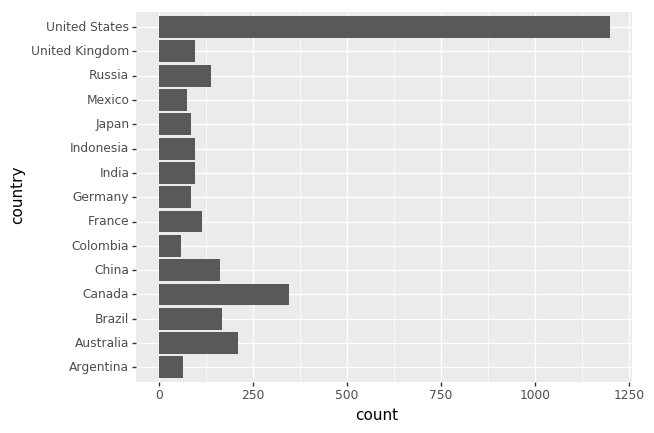

<ggplot: (296821175)>

In [29]:
ggplot(airports_small) + aes(x = 'country')  + geom_bar() + coord_flip()

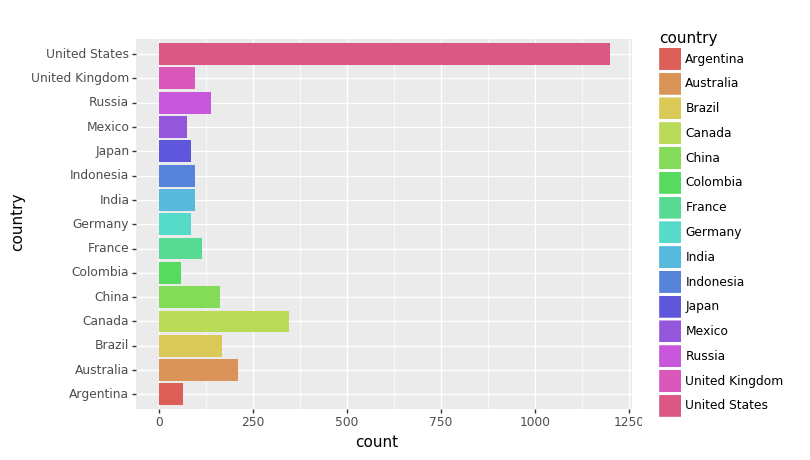

<ggplot: (-9223372036557960630)>

In [30]:
# Redundant but coloring by country
ggplot(airports_small) + aes(x = 'country', fill='country')  + geom_bar() + coord_flip()

### 2D - Categorical & Continuous - Points

What is the distribution of airports by altitude?

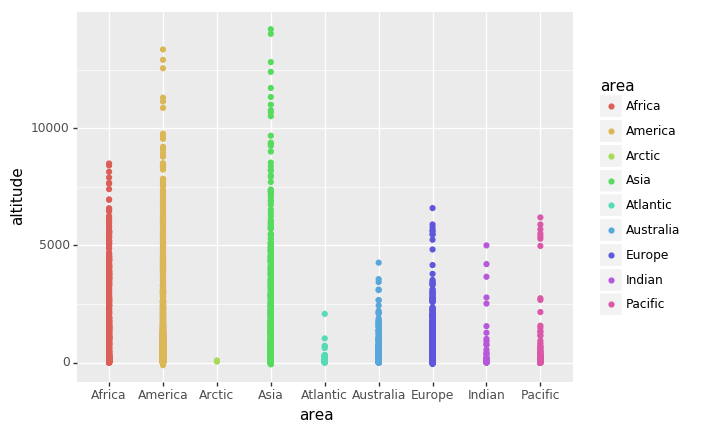

<ggplot: (296815841)>

In [31]:
ggplot(airports) + aes(x = 'area', y = 'altitude', color = "area")  + geom_point()

**Alpha Adjustment and Position Adjustment - Jitter**

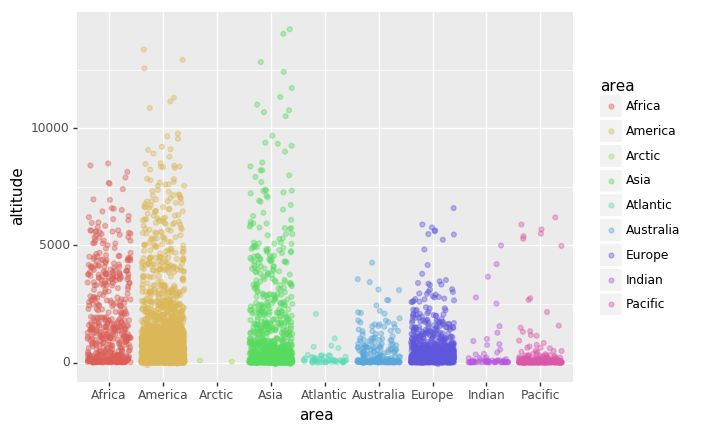

<ggplot: (-9223372036558622667)>

In [32]:
ggplot(airports) + aes(x = 'area', y = 'altitude', color='area') + geom_jitter(alpha = 0.4) 

**Scale Transformation**

In [56]:
# Hack to account for negative altitude
airports['altitude1'] = airports.altitude + 150

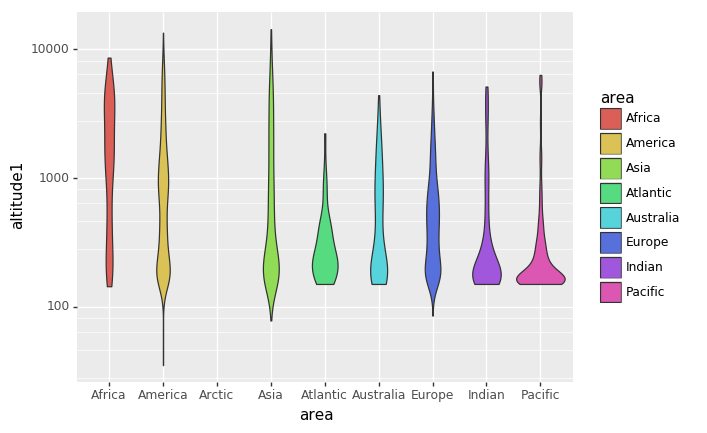

<ggplot: (-9223372036567654214)>

In [64]:
(ggplot(airports) + 
    aes(x = 'area', y = 'altitude1', fill='area') + 
    geom_violin() +
    scale_y_log10()
)

**Box Plot**

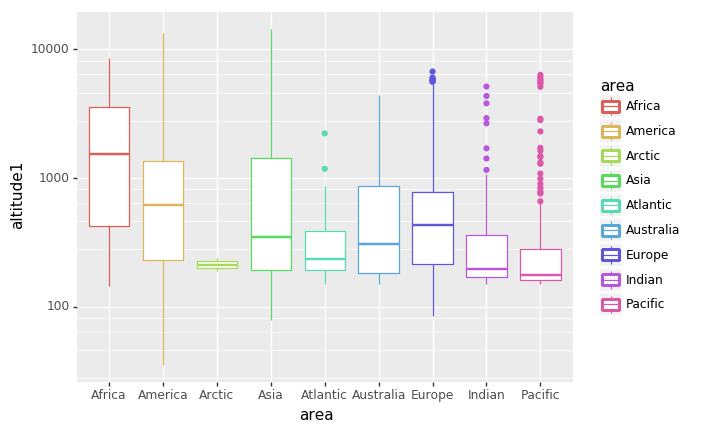

<ggplot: (293878767)>

In [65]:
(ggplot(airports) + 
    aes(x = 'area', y = 'altitude1', color='area') + 
    geom_boxplot() +
    scale_y_log10()
)

**Facetting**

/Users/amitkaps/miniconda3/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:90: UserWarning: 'stat_bin()' using 'bins = 29'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


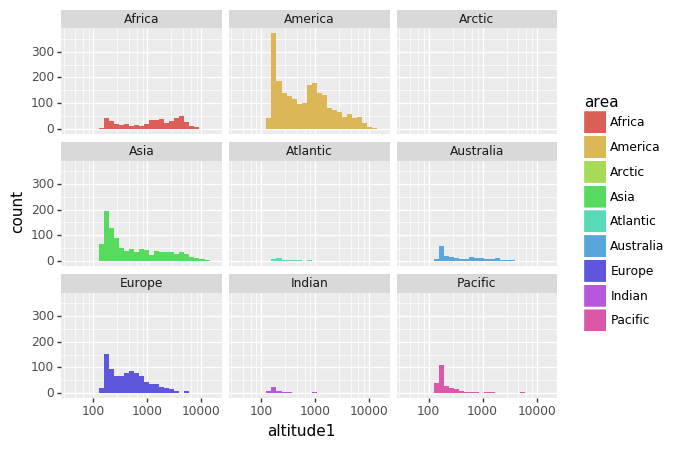

<ggplot: (-9223372036557411510)>

In [73]:
(ggplot(airports) + 
    aes(x = 'altitude1', fill='area') + 
    geom_histogram() +
    scale_x_log10() +
    facet_wrap('area')
 
)

### 2 Dimensional:  Categorical & Categorical -   Points

What is the distribution of airports by area and top 15 countries?

In [35]:
airports_small.area.unique()

array(['America', 'Europe', 'Asia', 'Australia', 'Pacific'], dtype=object)

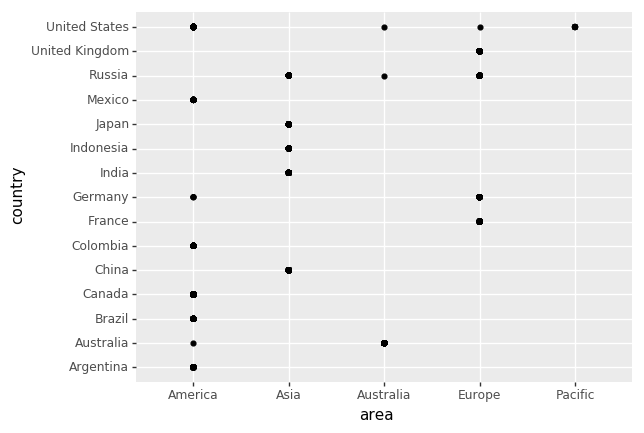

<ggplot: (297347385)>

In [36]:
ggplot(airports_small) + aes(x = 'area', y = 'country')  + geom_point()

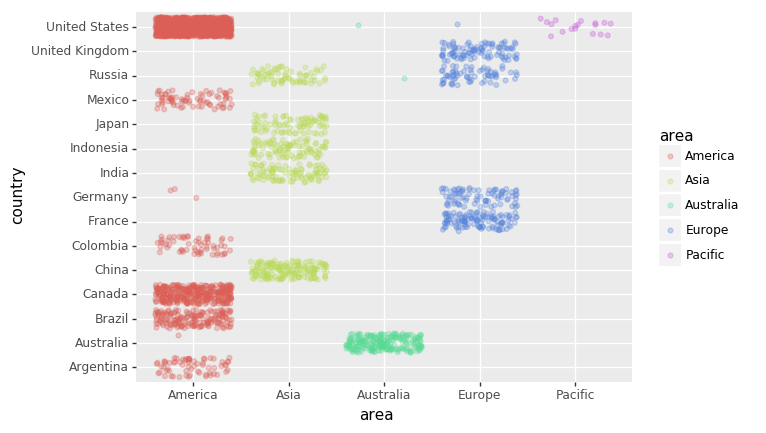

<ggplot: (-9223372036557416469)>

In [37]:
ggplot(airports_small) + aes(x = 'area', y = 'country', color = 'area')  + geom_jitter(alpha = 0.3)

### 2 Dimensional:  Categorical & Categorical -   Bars

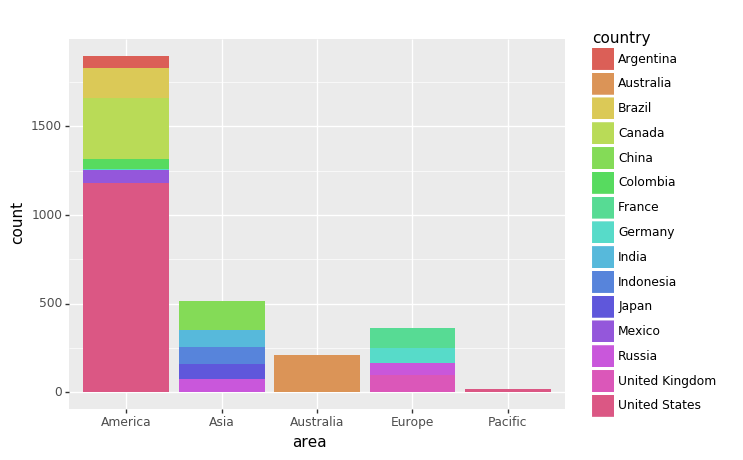

<ggplot: (296178005)>

In [38]:
ggplot(airports_small) + aes(x = 'area', fill = 'country')  + geom_bar()

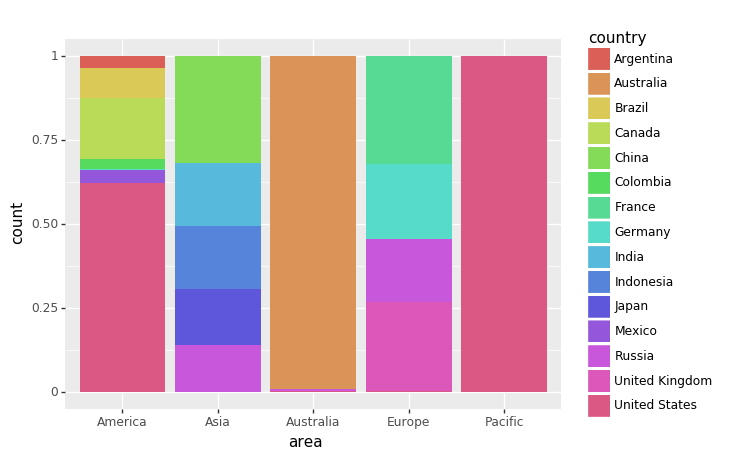

<ggplot: (297203660)>

In [39]:
ggplot(airports_small) + aes(x = 'area', fill = 'country')  + geom_bar(position = "fill")

### 2 Dimensional:  Continuous & Continuous - Points

In [94]:
plotnin.get_options()

AttributeError: type object 'ggplot' has no attribute 'get_options'

In [92]:
ggplot(airports) + aes(x = 'longitude', y = 'latitude')  + geom_bin2d() + aspect_ratio(1.5)

NameError: name 'aspect_ratio' is not defined

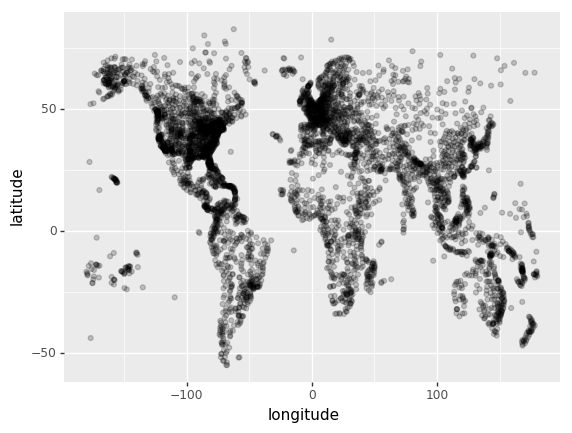

<ggplot: (-9223372036561932905)>

In [83]:
ggplot(airports) + aes(x = 'longitude', y = 'latitude')  + geom_point(alpha = 0.2)

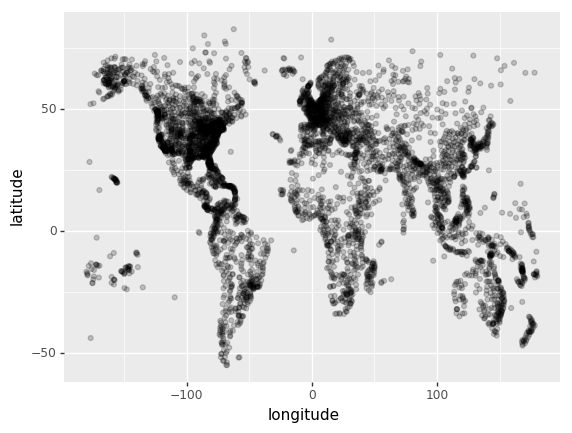

<ggplot: (286906404)>

In [84]:
( ggplot(airports) + 
    aes(x = 'longitude', y = 'latitude') + 
    geom_point(alpha = 0.2) +
    theme(aspect_ratio )
)

## Spatial Projection

In [124]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

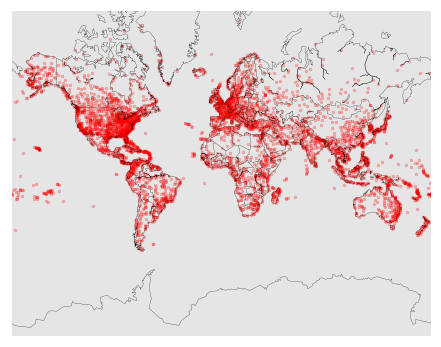

In [125]:
# set up orthographic map projection with
map = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)

# Convert latitude and longitude to x and y coordinates
x, y = m(list(airports["longitude"].astype(float)), list(airports["latitude"].astype(float)))

# Show the points
map.scatter(x,y,8,marker='o',color='red', alpha=0.25)

plt.show()